 SELF ATTENTION FROM SCRATCH

We will use the sequence :The animal did not cross the street because it was too tired

 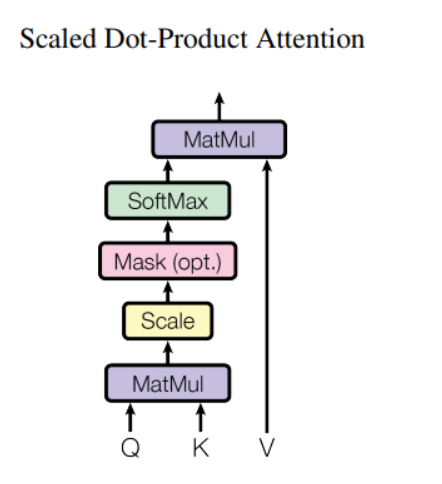

In [1]:
import numpy as np
import math

In [2]:
#assumption
L=11
d_k=6
d_v=6

In [3]:
q=np.random.randn(L,d_k)
k=np.random.randn(L,d_k)
v=np.random.randn(L,d_v)
q



array([[ 0.71035232, -0.96378332, -1.1596044 , -0.89132847,  0.9966782 ,
         0.88030087],
       [-0.16279365, -0.16067548, -0.14635338, -0.61471852,  1.13618262,
        -0.29300259],
       [-1.01902549,  0.60586129, -0.79382057, -1.00751303,  0.12003208,
        -0.2791785 ],
       [-1.97826407, -1.25585534,  1.70155367,  0.18791407, -0.59269932,
         0.23671603],
       [-0.13698262,  0.59215822,  0.64439716, -2.60396776, -0.23445169,
         2.20419817],
       [ 0.10175329,  0.81337909, -0.04270674, -0.84130077,  2.63472579,
         0.0927618 ],
       [ 0.63118431,  0.1598798 , -0.57341535, -1.21825604, -0.39147708,
         0.96049951],
       [-0.51790574,  0.50568583, -0.02727836, -2.12162764, -0.56123092,
        -1.18332757],
       [ 1.82381228, -0.24223167,  2.69512228, -0.4000414 ,  0.38554076,
        -0.69867975],
       [ 0.64420572, -0.723034  , -0.70579407,  0.13433944, -0.02269852,
         0.91641695],
       [ 0.56782528,  0.91277479,  0.32854357, -0.

In [4]:
k

array([[-0.26459265,  0.35402483,  0.03927694, -0.26439957,  0.11371962,
         0.35268997],
       [ 1.31946733,  0.74303518,  1.29448123,  0.23229512,  0.57680719,
        -0.08425562],
       [ 2.08571019, -1.60188971, -0.58700026,  1.51412372, -0.49853841,
        -0.03687216],
       [ 0.01652172, -0.01979891, -0.18166662, -0.60541981,  1.9308258 ,
         0.74232226],
       [ 1.28216854, -1.23336375, -0.074535  ,  0.25277299,  0.11665733,
        -1.26498618],
       [ 0.29794337,  1.23609703,  2.6866078 ,  0.63947899,  0.80968045,
        -1.34308076],
       [ 1.45766152, -0.19999068,  0.93193453, -1.44952672,  0.83762746,
         0.10029314],
       [-1.6489199 , -1.02395056, -0.87922374, -1.60736883,  0.11912842,
        -0.17747208],
       [-0.91625927,  2.17608677, -1.00620127,  0.55018796,  2.51591374,
         1.33964682],
       [ 1.42530286,  0.94034487,  0.42271518, -0.79966204,  0.15116354,
         0.80593089],
       [-0.03970002,  2.62651384,  0.46157846,  0.

In [5]:
v

array([[-0.49432971,  0.03005413,  1.83734886,  0.25370809,  0.09572012,
        -0.99449247],
       [-0.38049781, -0.35947407, -0.10787932,  0.708749  ,  0.17894591,
         1.12102328],
       [-1.10661478,  1.0980993 , -0.78050715,  1.30235517, -0.67006015,
        -2.10595423],
       [-1.14981333,  0.22249968, -1.15317847, -0.49199859,  0.70576967,
        -1.44721691],
       [-1.35551758,  1.53113309, -0.60519362,  0.04462659,  0.45882677,
        -1.48984814],
       [ 0.40344198, -0.42698072,  0.41677931,  0.85579386,  0.52466186,
         0.31370177],
       [-0.60750486,  0.25915154, -0.42172236, -0.37357957,  0.45057448,
        -1.60727665],
       [ 0.19722872, -0.21059098,  2.1713921 , -0.07579492, -1.336607  ,
        -1.03805537],
       [-0.34724734,  1.05021297, -0.6094057 ,  0.02612872, -0.03268178,
        -0.3026513 ],
       [-2.25042988, -0.33038368, -0.92996226, -0.03825527, -0.80374006,
         0.47115535],
       [-1.7123067 ,  0.62177653, -0.19038253,  0.

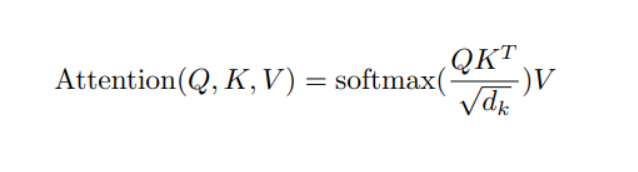

In [6]:
#key matrux transpose
k=k
k.shape

(11, 6)

In [7]:
print(q.shape)  # Expected: (N, d)
print(k.shape)  # Expected: (M, d)


(11, 6)
(11, 6)


In [8]:
#Attention score("Scaled Dot Product Attention")
#shows how much a word is related to the sentence

o=np.matmul(q, k.T)
o.shape


(11, 11)

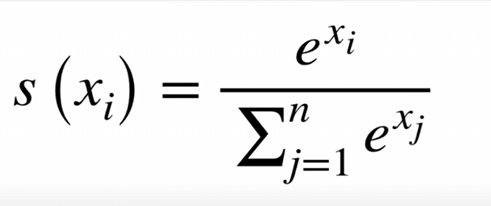

In [9]:
 #We suspect that for large values of d_k the dot product grows large in magnitude
 #pushing the softmax function into regions where it has very small gradiant hence
 # a  scaling of sqrt 1/d_k is done

b
q.var(),k.var(),scaled.var()


(1.000299852049877, 1.0855220767259512, 1.1232150816534676)

In [18]:
def softmax(x):
    return(np.exp(x).T /np.sum(np.exp(x),axis=-1)).T

In [21]:
#softmax converts a a vector of real numbers into a probability distribution thus giving us the gradiant of each token in the sentence inside a prob distribituion
attention=softmax(scaled)
attention

array([[0.05593964, 0.03612646, 0.1139347 , 0.21292984, 0.08007264,
        0.00690281, 0.14177134, 0.13431384, 0.10448309, 0.08779643,
        0.0257292 ],
       [0.06642172, 0.06234297, 0.03384572, 0.16351309, 0.07146649,
        0.06950721, 0.11306439, 0.12599587, 0.14461006, 0.06154842,
        0.08768404],
       [0.09266455, 0.03080339, 0.01284904, 0.09713295, 0.03316721,
        0.03347499, 0.05130987, 0.29142838, 0.19243342, 0.05553762,
        0.10919857],
       [0.11324401, 0.05495624, 0.03832409, 0.06109927, 0.06020613,
        0.22119343, 0.05205368, 0.31748681, 0.0238561 , 0.02777608,
        0.02980417],
       [0.08095371, 0.04312113, 0.00423004, 0.11778716, 0.00660573,
        0.01515984, 0.21313473, 0.12730834, 0.0804793 , 0.2484586 ,
        0.06276142],
       [0.02290394, 0.03716502, 0.00369218, 0.16552273, 0.01141249,
        0.04361273, 0.06533048, 0.02174192, 0.4322278 , 0.03774291,
        0.1586478 ],
       [0.09023436, 0.06341912, 0.06585965, 0.10294045, 0.

In [22]:
new_v=np.matmul(attention,v)
new_v

array([[-0.85561875,  0.38601342, -0.19953062,  0.04043298, -0.07518071,
        -1.00074767],
       [-0.73355626,  0.32170347, -0.0500969 ,  0.07550344, -0.03193569,
        -0.58939829],
       [-0.56736459,  0.26749305,  0.46023212,  0.05404012, -0.35975933,
        -0.52351641],
       [-0.27275641,  0.01810328,  0.77891522,  0.2486607 , -0.25573234,
        -0.60477638],
       [-0.99830087,  0.0913075 , -0.09822001, -0.057171  , -0.19817726,
        -0.50799519],
       [-0.75982586,  0.57952081, -0.45346214,  0.0468582 ,  0.035259  ,
        -0.24323333],
       [-0.98205389,  0.20814993, -0.10276758,  0.07089393, -0.19145661,
        -0.59494413],
       [-0.50230191,  0.06774594,  0.68395115,  0.05566113, -0.39280043,
        -0.67179231],
       [-0.27497036, -0.09536865, -0.00195085,  0.49671658,  0.3106752 ,
        -0.07726593],
       [-0.9590344 ,  0.52688677, -0.27818521,  0.36288062, -0.1966145 ,
        -1.03233895],
       [-0.92003131,  0.28217281, -0.27074265,  0.

self attention with masking

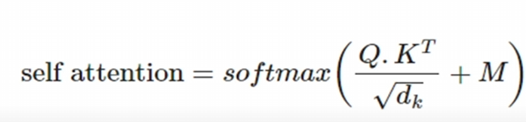

sequence:The animal did not cross the street because it was too tired

In [24]:
#Masking is used in the self-attention mechanism to control which tokens a model attends to. It prevents unwanted interactions between certain tokens, ensuring proper information flow.
mask=np.tril(np.ones((L,L)))
mask

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [27]:
mask[mask==0]=-np.infty#so that softmax of inf becomes 0
mask[mask==1]=0 #to not interfere with scaled values

In [28]:
mask


array([[  0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
       [  0.,   0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
       [  0.,   0.,   0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
       [  0.,   0.,   0.,   0., -inf, -inf, -inf, -inf, -inf, -inf, -inf],
       [  0.,   0.,   0.,   0.,   0., -inf, -inf, -inf, -inf, -inf, -inf],
       [  0.,   0.,   0.,   0.,   0.,   0., -inf, -inf, -inf, -inf, -inf],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0., -inf, -inf, -inf, -inf],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -inf, -inf, -inf],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -inf, -inf],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -inf],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [36]:
scaled=np.matmul(q,k.T)/math.sqrt(d_k)
masked_attention=softmax(scaled+mask)
masked_attention #the array shows as the model predicts the next elements are masked and stays hidden in order to ensure proper flow of the model

array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.51583799, 0.48416201, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.67977264, 0.22596882, 0.09425854, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.42314656, 0.20534898, 0.14320145, 0.228303  , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.32035783, 0.1706431 , 0.01673951, 0.4661187 , 0.02614085,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.08056   , 0.13072048, 0.0129865 , 0.58219289, 0.04014113,
        0.15339899, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.16375871, 0.11509399, 0.11952311, 0.18681792, 0.

In [37]:
new_v1=np.matmul(masked_attention,v)
new_v1

array([[-0.49432971,  0.03005413,  1.83734886,  0.25370809,  0.09572012,
        -0.99449247],
       [-0.43921663, -0.15854062,  0.89554327,  0.47402161,  0.13601489,
         0.02975989],
       [-0.52632035,  0.04270529,  1.15103265,  0.45537709,  0.04234522,
        -0.62121664],
       [-0.70828344,  0.14694643,  0.38027108,  0.32707099,  0.14242575,
        -0.82259476],
       [-0.81319979,  0.11040433,  0.0037966 , -0.00414188,  0.39095066,
        -0.87607197],
       [-0.76587068,  0.09519174, -0.50795321, -0.02336904,  0.53219588,
        -0.81516663],
       [-0.76103734,  0.33987872, -0.18561675,  0.10955611,  0.27804498,
        -1.15090441],
       [-0.24060251,  0.03752256,  0.95155924,  0.03792197, -0.3575809 ,
        -0.95455397],
       [-0.12101401, -0.09666398,  0.05962447,  0.53108048,  0.39649838,
        -0.14479308],
       [-0.93268988,  0.52356815, -0.28125597,  0.36020519, -0.18762665,
        -1.11895461],
       [-0.92003131,  0.28217281, -0.27074265,  0.